# 3D trajectory

In this notebook, we construct the 3D trajectories of inner droplets by combining the X-Y plane tracking results and the simultaneous stage positions.

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import os

In [8]:
folder = '/home/zhengyang/data/DE/07202021/1st-drop-tracking/2021-07-20_16h42m46s'
stagePosition = pd.read_csv(os.path.join(folder, 'StagePosition.txt'), delimiter='\t',
                            names=['name', 'x', 'y', 'z', 'UK1', 'UK2'])

In [10]:
xyPosition = pd.read_csv(os.path.join(folder, 'images', 'crop_HoughCircles', 'traj.csv'))

In [14]:
stagePosition 

,name,x,y,z,UK1,UK2
0,52517,-876.83,-812.44,11.062,0.0,18 7D A9 FE FF 19 A4 C2 FE FF 1A AA 05 00 00
1,52518,-876.83,-812.44,11.062,0.0,18 7D A9 FE FF 19 A4 C2 FE FF 1A AA 05 00 00
2,52519,-876.83,-812.44,11.062,0.0,18 7D A9 FE FF 19 A4 C2 FE FF 1A AA 05 00 00
3,52520,-876.83,-812.44,11.062,0.0,18 7D A9 FE FF 19 A4 C2 FE FF 1A AA 05 00 00
4,52521,-876.84,-812.44,11.062,0.0,18 7C A9 FE FF 19 A4 C2 FE FF 1A AA 05 00 00
...,...,...,...,...,...,...
1800,54317,-876.86,-812.46,45.011,0.0,18 7A A9 FE FF 19 A2 C2 FE FF 1A 0C 17 00 00
1801,54318,-876.86,-812.46,45.011,0.0,18 7A A9 FE FF 19 A2 C2 FE FF 1A 0C 17 00 00
1802,54319,-876.86,-812.46,45.011,0.0,18 7A A9 FE FF 19 A2 C2 FE FF 1A 0C 17 00 00
1803,54320,-876.86,-812.46,45.011,0.0,18 7A A9 FE FF 19 A2 C2 FE FF 1A 0C 17 00 00


In [13]:
xyPosition

,x,y,filename,validity
0,700.5,442.5,52517,False
1,691.5,453.5,52518,False
2,686.5,427.5,52519,False
3,692.5,462.5,52520,False
4,685.5,461.5,52521,False
...,...,...,...,...
1799,625.5,555.5,54317,True
1800,627.5,554.5,54318,True
1801,624.5,552.5,54319,True
1802,629.5,552.5,54320,True


In [15]:
xyPosition = xyPosition.set_index('filename')
stagePosition = stagePosition.set_index('name')

In [16]:
xyPosition['z'] = stagePosition['z']

In [17]:
xyPosition

,x,y,validity,z
filename,,,,
52517,700.5,442.5,False,11.062
52518,691.5,453.5,False,11.062
52519,686.5,427.5,False,11.062
52520,692.5,462.5,False,11.062
52521,685.5,461.5,False,11.062
...,...,...,...,...
54317,625.5,555.5,True,45.011
54318,627.5,554.5,True,45.011
54319,624.5,552.5,True,45.011


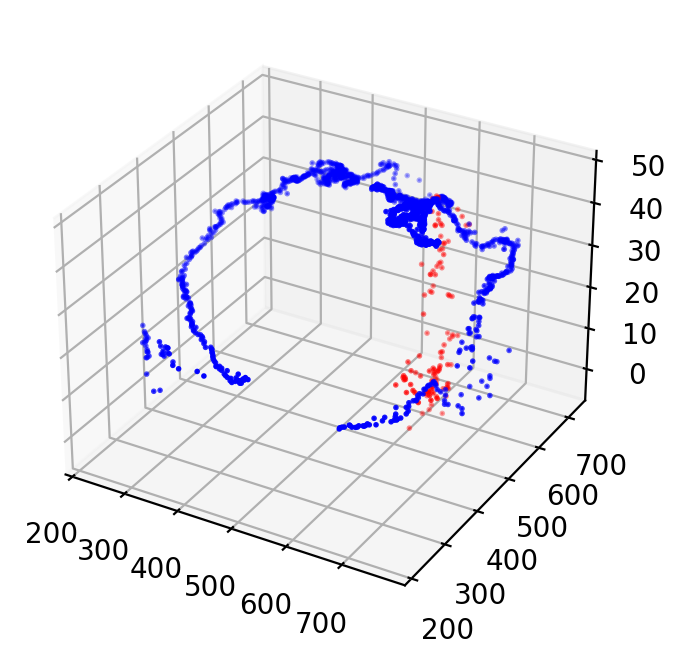

In [21]:
fig = plt.figure(dpi=200)
ax = fig.add_subplot(111, projection='3d')
ax.scatter(xyPosition.x, xyPosition.y, xyPosition.z, 
           s=1, c=-xyPosition.validity, cmap='bwr')